In [8]:
import numpy as np
import pandas as pd
from PIL import Image as im
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,GlobalMaxPooling2D,Activation,MaxPooling2D
from tensorflow.nn import local_response_normalization as lrn
#create model

In [9]:
final_df = pd.read_csv(r"C:\Users\20190\Downloads\final_train.csv")
X = final_df.drop(columns = ['emotion'])
X = X.to_numpy()
x_temp = np.reshape(X,(28709,48,48,1))
x_temp = x_temp/255

y = final_df['emotion']
y = y.to_numpy()
b = np.zeros((y.size, y.max()+1))
b[np.arange(y.size),y] = 1

In [10]:
x_temp.shape

(28709, 48, 48, 1)

In [11]:
model = Sequential()

model.add(Conv2D(256, kernel_size=3, activation='relu', input_shape=(48,48,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

model.fit(x_temp[2870:],b[2870:],epochs = 25,validation_data = (x_temp[0:2870],b[0:2870]))

Epoch 1/25
808/808 [==============================] - 25s 30ms/step - loss: 1.6872 - accuracy: 0.3279 - val_loss: 1.5442 - val_accuracy: 0.4157
Epoch 2/25
808/808 [==============================] - 24s 29ms/step - loss: 1.4501 - accuracy: 0.4455 - val_loss: 1.4276 - val_accuracy: 0.4540
Epoch 3/25
808/808 [==============================] - 24s 29ms/step - loss: 1.3139 - accuracy: 0.5005 - val_loss: 1.3609 - val_accuracy: 0.4746
Epoch 4/25
808/808 [==============================] - 26s 32ms/step - loss: 1.2182 - accuracy: 0.5399 - val_loss: 1.3493 - val_accuracy: 0.4902
Epoch 5/25
808/808 [==============================] - 25s 31ms/step - loss: 1.1393 - accuracy: 0.5737 - val_loss: 1.3472 - val_accuracy: 0.4983
Epoch 6/25
808/808 [==============================] - 41s 51ms/step - loss: 1.0641 - accuracy: 0.6019 - val_loss: 1.3697 - val_accuracy: 0.4864
Epoch 7/25
808/808 [==============================] - 27s 33ms/step - loss: 0.9895 - accuracy: 0.6305 - val_loss: 1.4024 - val_accuracy:

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_data_dir = 'train'
validation_data_dir = 'validation'
img_rows = 48
img_cols = 48
batch_size = 32
num_classes = 5

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.3,
                    zoom_range=0.3,
                    width_shift_range=0.4,
                    height_shift_range=0.4,
                    horizontal_flip=True,
                    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_data_dir,
                    color_mode='grayscale',
                    target_size=(48,48),
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
                        validation_data_dir,
                        color_mode='grayscale',
                        target_size=(img_rows,img_cols),
                        batch_size=batch_size,
                        class_mode='categorical',
                        shuffle=True)


nb_train_samples = 24176
nb_validation_samples = 3006
epochs=50

Found 24282 images belonging to 5 classes.
Found 5937 images belonging to 5 classes.


#### USE X_TEMP FOR NEURAL NETWORKS and X for LOGISTIC REGRESSION

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,GlobalMaxPooling2D,Activation,MaxPooling2D
from tensorflow.nn import local_response_normalization as lrn
#create model

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau



In [14]:
model = Sequential()

model.add(Conv2D(256, kernel_size=3, activation='relu', input_shape=(48,48,1)))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('our_model_adam.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

callbacks = [checkpoint]

history_model_adam = model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

C:\Users\20190\AppData\Local\Temp/ipykernel_1512/1606484146.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_model_adam = model.fit_generator(


Epoch 1/50
754/755 [============================>.] - ETA: 0s - loss: 1.5941 - accuracy: 0.2770
Epoch 00001: val_loss improved from inf to 1.96563, saving model to our_model_adam.h5
755/755 [==============================] - 23s 30ms/step - loss: 1.5941 - accuracy: 0.2768 - val_loss: 1.9656 - val_accuracy: 0.2349
Epoch 2/50
754/755 [============================>.] - ETA: 0s - loss: 1.5626 - accuracy: 0.2925
Epoch 00002: val_loss improved from 1.96563 to 1.73926, saving model to our_model_adam.h5
755/755 [==============================] - 16s 21ms/step - loss: 1.5627 - accuracy: 0.2925 - val_loss: 1.7393 - val_accuracy: 0.2144
Epoch 3/50
754/755 [============================>.] - ETA: 0s - loss: 1.5565 - accuracy: 0.2923
Epoch 00003: val_loss improved from 1.73926 to 1.63270, saving model to our_model_adam.h5
755/755 [==============================] - 16s 21ms/step - loss: 1.5564 - accuracy: 0.2924 - val_loss: 1.6327 - val_accuracy: 0.2917
Epoch 4/50
753/755 [===========================

754/755 [============================>.] - ETA: 0s - loss: 1.3380 - accuracy: 0.4281
Epoch 00029: val_loss did not improve from 1.47841
755/755 [==============================] - 16s 21ms/step - loss: 1.3377 - accuracy: 0.4282 - val_loss: 4.5876 - val_accuracy: 0.1979
Epoch 30/50
754/755 [============================>.] - ETA: 0s - loss: 1.3333 - accuracy: 0.4389
Epoch 00030: val_loss did not improve from 1.47841
755/755 [==============================] - 16s 21ms/step - loss: 1.3336 - accuracy: 0.4387 - val_loss: 1.9277 - val_accuracy: 0.3595
Epoch 31/50
754/755 [============================>.] - ETA: 0s - loss: 1.3262 - accuracy: 0.4350
Epoch 00031: val_loss did not improve from 1.47841
755/755 [==============================] - 16s 21ms/step - loss: 1.3261 - accuracy: 0.4352 - val_loss: 2.4407 - val_accuracy: 0.3192
Epoch 32/50
754/755 [============================>.] - ETA: 0s - loss: 1.3161 - accuracy: 0.4425
Epoch 00032: val_loss did not improve from 1.47841
755/755 [============

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_data_dir = 'train'
validation_data_dir = 'validation'
img_rows = 48
img_cols = 48
batch_size = 32
num_classes = 5

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                width_shift_range=0.4,
                height_shift_range=0.4,
                horizontal_flip=True,
                fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                color_mode='grayscale',
                target_size=(48,48),
                batch_size=batch_size,
                class_mode='categorical',
                shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
                        validation_data_dir,
                        color_mode='grayscale',
                        target_size=(img_rows,img_cols),
                        batch_size=batch_size,
                        class_mode='categorical',
                        shuffle=True)


model = Sequential()

# Block-1

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))



Found 24282 images belonging to 5 classes.
Found 5937 images belonging to 5 classes.


In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(0.001),
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('main_vgg_adam.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

callbacks = [checkpoint]

nb_train_samples = 24176
nb_validation_samples = 3006
epochs=50

history_vgg_adam = model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)


C:\Users\20190\AppData\Local\Temp/ipykernel_1512/2606543667.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_vgg_adam = model.fit_generator(


Epoch 1/50
755/755 [==============================] - ETA: 0s - loss: 1.8805 - accuracy: 0.2409
Epoch 00001: val_loss improved from inf to 1.54349, saving model to main_vgg_adam.h5
755/755 [==============================] - 35s 42ms/step - loss: 1.8805 - accuracy: 0.2409 - val_loss: 1.5435 - val_accuracy: 0.3142
Epoch 2/50
755/755 [==============================] - ETA: 0s - loss: 1.5811 - accuracy: 0.2797
Epoch 00002: val_loss improved from 1.54349 to 1.54093, saving model to main_vgg_adam.h5
755/755 [==============================] - 30s 40ms/step - loss: 1.5811 - accuracy: 0.2797 - val_loss: 1.5409 - val_accuracy: 0.3098
Epoch 3/50
755/755 [==============================] - ETA: 0s - loss: 1.5597 - accuracy: 0.2939
Epoch 00003: val_loss improved from 1.54093 to 1.53498, saving model to main_vgg_adam.h5
755/755 [==============================] - 30s 40ms/step - loss: 1.5597 - accuracy: 0.2939 - val_loss: 1.5350 - val_accuracy: 0.3175
Epoch 4/50
755/755 [==============================

Epoch 28/50
755/755 [==============================] - ETA: 0s - loss: 0.9878 - accuracy: 0.6159
Epoch 00028: val_loss did not improve from 0.79423
755/755 [==============================] - 30s 40ms/step - loss: 0.9878 - accuracy: 0.6159 - val_loss: 0.7946 - val_accuracy: 0.6966
Epoch 29/50
755/755 [==============================] - ETA: 0s - loss: 0.9843 - accuracy: 0.6160
Epoch 00029: val_loss did not improve from 0.79423
755/755 [==============================] - 30s 40ms/step - loss: 0.9843 - accuracy: 0.6160 - val_loss: 0.8029 - val_accuracy: 0.6902
Epoch 30/50
755/755 [==============================] - ETA: 0s - loss: 0.9805 - accuracy: 0.6181
Epoch 00030: val_loss improved from 0.79423 to 0.79329, saving model to main_vgg_adam.h5
755/755 [==============================] - 31s 40ms/step - loss: 0.9805 - accuracy: 0.6181 - val_loss: 0.7933 - val_accuracy: 0.6935
Epoch 31/50
755/755 [==============================] - ETA: 0s - loss: 0.9749 - accuracy: 0.6215
Epoch 00031: val_loss 

In [18]:
model = Sequential()

# Block-1

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = SGD(),
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('main_vgg_sgd.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

callbacks = [checkpoint]

nb_train_samples = 24176
nb_validation_samples = 3006
epochs=50

history_vgg_sgd = model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)


C:\Users\20190\AppData\Local\Temp/ipykernel_1512/3621243370.py:83: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_vgg_sgd = model.fit_generator(


Epoch 1/50
755/755 [==============================] - ETA: 0s - loss: 1.8687 - accuracy: 0.2369
Epoch 00001: val_loss improved from inf to 1.53784, saving model to main_vgg_sgd.h5
755/755 [==============================] - 31s 40ms/step - loss: 1.8687 - accuracy: 0.2369 - val_loss: 1.5378 - val_accuracy: 0.3162
Epoch 2/50
755/755 [==============================] - ETA: 0s - loss: 1.5733 - accuracy: 0.2879
Epoch 00002: val_loss did not improve from 1.53784
755/755 [==============================] - 30s 40ms/step - loss: 1.5733 - accuracy: 0.2879 - val_loss: 1.5416 - val_accuracy: 0.3085
Epoch 3/50
755/755 [==============================] - ETA: 0s - loss: 1.5613 - accuracy: 0.2918
Epoch 00003: val_loss did not improve from 1.53784
755/755 [==============================] - 30s 40ms/step - loss: 1.5613 - accuracy: 0.2918 - val_loss: 1.5432 - val_accuracy: 0.3065
Epoch 4/50
755/755 [==============================] - ETA: 0s - loss: 1.5585 - accuracy: 0.2939
Epoch 00004: val_loss improved 

755/755 [==============================] - ETA: 0s - loss: 1.4470 - accuracy: 0.3565
Epoch 00028: val_loss improved from 1.35298 to 1.35104, saving model to main_vgg_sgd.h5
755/755 [==============================] - 30s 40ms/step - loss: 1.4470 - accuracy: 0.3565 - val_loss: 1.3510 - val_accuracy: 0.3985
Epoch 29/50
755/755 [==============================] - ETA: 0s - loss: 1.4426 - accuracy: 0.3603
Epoch 00029: val_loss improved from 1.35104 to 1.34846, saving model to main_vgg_sgd.h5
755/755 [==============================] - 30s 40ms/step - loss: 1.4426 - accuracy: 0.3603 - val_loss: 1.3485 - val_accuracy: 0.4009
Epoch 30/50
755/755 [==============================] - ETA: 0s - loss: 1.4375 - accuracy: 0.3627
Epoch 00030: val_loss did not improve from 1.34846
755/755 [==============================] - 30s 40ms/step - loss: 1.4375 - accuracy: 0.3627 - val_loss: 1.4097 - val_accuracy: 0.3837
Epoch 31/50
755/755 [==============================] - ETA: 0s - loss: 1.4394 - accuracy: 0.365

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(),
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('main_vgg_rms.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

callbacks = [checkpoint]

nb_train_samples = 24176
nb_validation_samples = 3006
epochs=50

history_vgg_rms = model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)


C:\Users\20190\AppData\Local\Temp/ipykernel_1512/2004773283.py:83: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_vgg_rms = model.fit_generator(


Epoch 1/50
755/755 [==============================] - ETA: 0s - loss: 1.8693 - accuracy: 0.2372
Epoch 00001: val_loss improved from inf to 1.70598, saving model to main_vgg_rms.h5
755/755 [==============================] - 34s 43ms/step - loss: 1.8693 - accuracy: 0.2372 - val_loss: 1.7060 - val_accuracy: 0.2376
Epoch 2/50
755/755 [==============================] - ETA: 0s - loss: 1.5805 - accuracy: 0.2811
Epoch 00002: val_loss improved from 1.70598 to 1.54352, saving model to main_vgg_rms.h5
755/755 [==============================] - 32s 43ms/step - loss: 1.5805 - accuracy: 0.2811 - val_loss: 1.5435 - val_accuracy: 0.3101
Epoch 3/50
755/755 [==============================] - ETA: 0s - loss: 1.5545 - accuracy: 0.2960
Epoch 00003: val_loss improved from 1.54352 to 1.47141, saving model to main_vgg_rms.h5
755/755 [==============================] - 32s 43ms/step - loss: 1.5545 - accuracy: 0.2960 - val_loss: 1.4714 - val_accuracy: 0.3528
Epoch 4/50
755/755 [==============================] -

Epoch 28/50
755/755 [==============================] - ETA: 0s - loss: 0.9954 - accuracy: 0.6177
Epoch 00028: val_loss did not improve from 0.77553
755/755 [==============================] - 32s 42ms/step - loss: 0.9954 - accuracy: 0.6177 - val_loss: 0.8052 - val_accuracy: 0.6875
Epoch 29/50
755/755 [==============================] - ETA: 0s - loss: 0.9931 - accuracy: 0.6176
Epoch 00029: val_loss did not improve from 0.77553
755/755 [==============================] - 32s 42ms/step - loss: 0.9931 - accuracy: 0.6176 - val_loss: 0.7869 - val_accuracy: 0.7019
Epoch 30/50
755/755 [==============================] - ETA: 0s - loss: 0.9787 - accuracy: 0.6246
Epoch 00030: val_loss improved from 0.77553 to 0.76149, saving model to main_vgg_rms.h5
755/755 [==============================] - 32s 43ms/step - loss: 0.9787 - accuracy: 0.6246 - val_loss: 0.7615 - val_accuracy: 0.7023
Epoch 31/50
755/755 [==============================] - ETA: 0s - loss: 0.9688 - accuracy: 0.6329
Epoch 00031: val_loss d

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


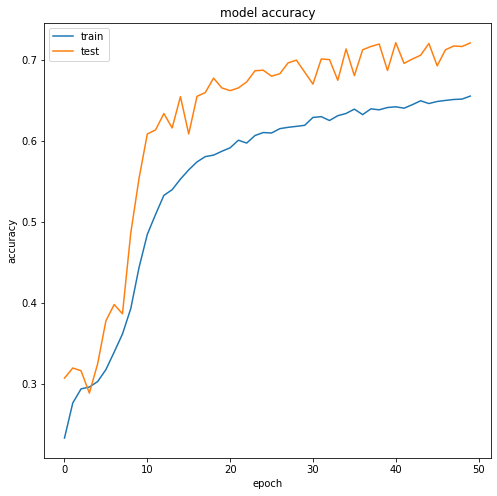

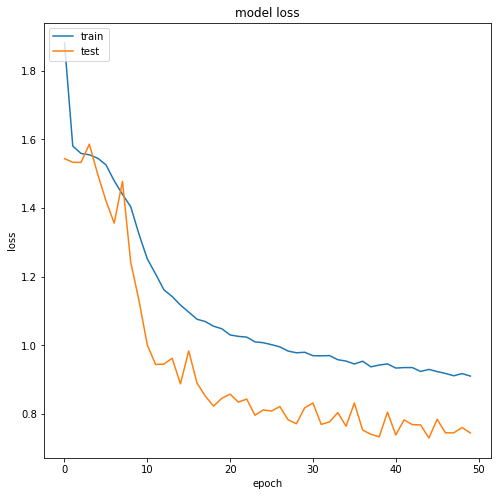

In [20]:
print(history_vgg.history.keys())
# summarize history for accuracy
fig = plt.figure(figsize = (8,8))
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('vgg_acc_graph.jpeg')
# summarize history for loss
fig = plt.figure(figsize = (8,8))
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('vgg_loss_graph.jpeg')

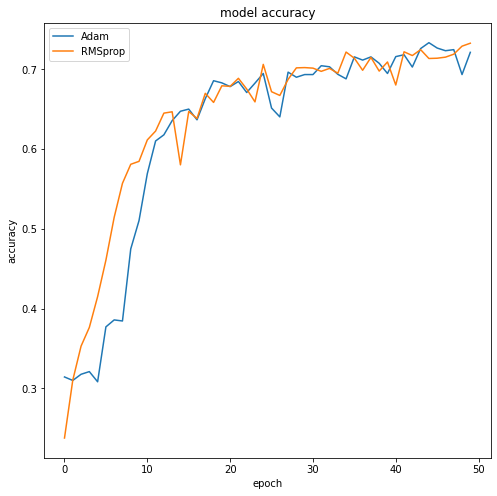

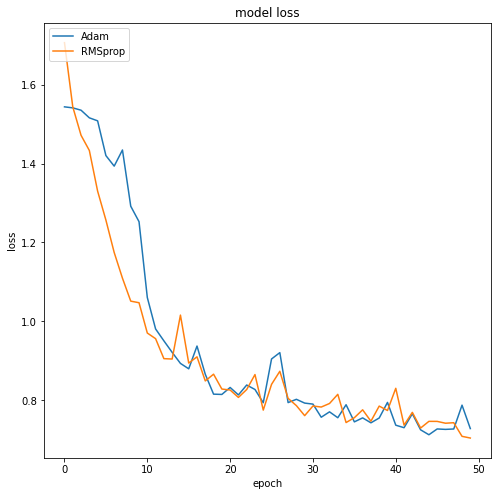

In [21]:

# summarize history for accuracy
fig = plt.figure(figsize = (8,8))
plt.plot(history_vgg_adam.history['val_accuracy'])
plt.plot(history_vgg_rms.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Adam', 'RMSprop'], loc='upper left')
plt.show()
fig.savefig('vgg_comp_acc_graph.jpeg')
# summarize history for loss
fig = plt.figure(figsize = (8,8))
plt.plot(history_vgg_adam.history['val_loss'])
plt.plot(history_vgg_rms.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Adam', 'RMSprop'], loc='upper left')
plt.show()
fig.savefig('vgg_comp_loss_graph.jpeg')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


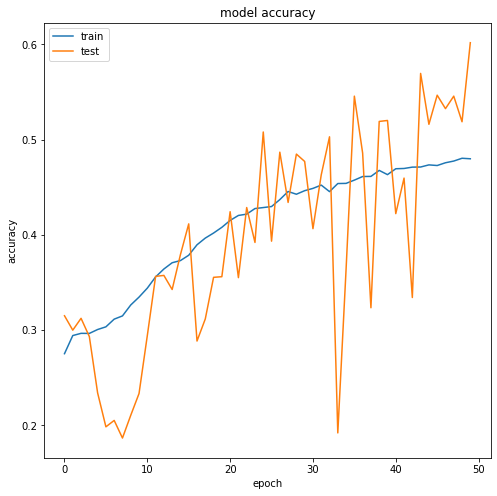

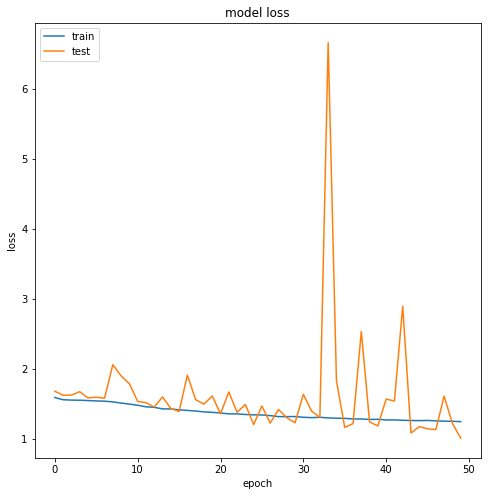

In [22]:
print(history_model_2.history.keys())
# summarize history for accuracy
fig = plt.figure(figsize = (8,8))
plt.plot(history_model_2.history['accuracy'])
plt.plot(history_model_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('our_model_acc_graph.jpeg')
# summarize history for loss
fig = plt.figure(figsize = (8,8))
plt.plot(history_model_2.history['loss'])
plt.plot(history_model_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('our_model_loss_graph.jpeg')

In [22]:
import pickle

In [23]:
filehandler = open('vgg_adam', 'wb')
pickle.dump(history_vgg_adam.history, filehandler)

In [24]:
filehandler = open('vgg_rms', 'wb')
pickle.dump(history_vgg_rms.history, filehandler)